In [10]:
import pandas as pd
import numpy as np

from requests import get


import re
import unicodedata
import json
from json.decoder import JSONDecodeError
from bs4 import BeautifulSoup

# Visual Imports
import time
from tqdm import tqdm
import nltk

import env

# Data

# Let's webscrape Github

# creating user header
# headers = {"Authorization": f"token {github_token}", "User-Agent": github_username}

headers = {"Authorization": f"token {env.github_token}", f"User-Agent": env.github_username}

# githubs page, most forked repo associated to the keyword "blackjack"
root_url = 'https://github.com/search?q=stars%3A%3E1+blackjack&type=Repositories'

# Create a response based on my headers
response = get(root_url, headers = headers)


response

# create soup object
soup = BeautifulSoup(response.content, 'html.parser')

# create a find_all list
anchors = soup.find_all('a',class_ = 'v-align-middle')

# list comprehension 
# for anchor in the list, anchor.get pull('href')
for anchor in anchors:
    href = anchor.get('href')
    print(href)

# Next Page

# get the response for next page
next_page = soup.find('a',class_ = "next_page")['href']

next_page = ('https://github.com' + next_page)

# Create a response based on my headers
response = get(next_page, headers = headers)


# create soup object
soup = BeautifulSoup(response.content, 'html.parser')

# lets make a function!!

def get_repos():
    
    # create an empty dataframe
    df = pd.DataFrame()

    # create start point
    root_url = 'https://github.com/search?q=stars%3A%3E1+blackjack&type=Repositories'

    # Create a start point result
    response = get(root_url, headers = headers)

    # Create soup object
    soup = BeautifulSoup(response.content, 'html.parser')

    # create a find_all list
    anchors = soup.find_all('a',class_ = 'v-align-middle')

    # create a list to store hrefs
    hrefs = []

    # list comprehension 
    # for anchor in the list, anchor.get pull('href')
    for anchor in anchors:
        href = anchor.get('href')
        hrefs.append(href)

    # append the hrefs to the data frame
    df = df.append(pd.DataFrame({'href': hrefs}))
    
    
    #####NEXT PAGES##########
    
    # get the response for next page
    next_page = soup.find('a',class_ = 'next_page')['href']

    next_page = ('https://github.com' + next_page)

    # Create a response based on my headers
    response = get(next_page, headers = headers)

    # create soup object
    soup = BeautifulSoup(response.content, 'html.parser')
    
    
    return df, next_page

def get_repo():
    # create an empty dataframe
    df = pd.DataFrame()
    # create a list to store hrefs
    hrefs = []
    ###############
    for i in tqdm(range(1,51)):
        url = f'https://github.com/search?o=desc&p={i}&q=blackjack&s=forks&type=Repositories'
        # Create a response based on my headers
        print(url)
        response = get(url, headers=headers)
        print(response.ok,response.status_code)
        # create soup object
        soup = BeautifulSoup(response.content, 'html.parser')
        # create a find_all list
        anchors = soup.find_all('a', class_='v-align-middle')
        
        # list comprehension to get href values for all anchor tags
        for anchor in anchors:
            href = anchor.get('href')
            print(href)
            hrefs.append(href)
        # wait a bit to avoid overloading the API
        time.sleep(15)
    # append the hrefs to the data frame
    df = df.append(pd.DataFrame({'href': hrefs}))
   
    return df

/cocos-creator/tutorial-blackjack-deprecated
/setzer22/blackjack
/xfhg/blackjackin
/datamllab/rlcard
/rubbertoe98/DiamondBlackjack
/tonyspiro/blackjack
/ChrisZieba/blackjack
/seblau/BlackJack-Simulator
/next-step/kotlin-blackjack
/kevinleedrum/vlackjack


In [7]:
''' for i in tqdm(range(0,1)):

    # repeat the same code to get hrefs and append to the data frame
    next_page_url = ('https://github.com' + next_page)

    # Create a response based on my headers
    response = get(next_page_url, headers=headers)

    # create soup object
    soup = BeautifulSoup(response.content, 'html.parser')

    # create a find_all list
    anchors = soup.find_all('a', class_='v-align-middle')

    # list comprehension to get href values for all anchor tags
    hrefs += [anchor.get('href') for anchor in anchors]

    # get the response for next page
    next_page = soup.find('a', class_='next_page')['href']

    # wait a bit to avoid overloading the API
    time.sleep(0.2)

return df'''

" for i in tqdm(range(0,1)):\n\n    # repeat the same code to get hrefs and append to the data frame\n    next_page_url = ('https://github.com' + next_page)\n\n    # Create a response based on my headers\n    response = get(next_page_url, headers=headers)\n\n    # create soup object\n    soup = BeautifulSoup(response.content, 'html.parser')\n\n    # create a find_all list\n    anchors = soup.find_all('a', class_='v-align-middle')\n\n    # list comprehension to get href values for all anchor tags\n    hrefs += [anchor.get('href') for anchor in anchors]\n\n    # get the response for next page\n    next_page = soup.find('a', class_='next_page')['href']\n\n    # wait a bit to avoid overloading the API\n    time.sleep(0.2)\n\nreturn df"

In [8]:
df = get_repo()

  0%|          | 0/50 [00:00<?, ?it/s]

https://github.com/search?o=desc&p=1&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/simple-blackjack-cli-prework
/rocketacademy/basics-blackjack
/datamllab/rlcard
/learn-co-students/simple-blackjack-cli-001-prework-web
/cocos-creator/tutorial-blackjack-deprecated
/learn-co-students/simple-blackjack-cli-online-web-prework
/woowacourse/java-blackjack
/learn-co-students/cli-applications-simple-blackjack-online-web-prework
/KillovSky/Iris
/next-step/kotlin-blackjack


  2%|▏         | 1/50 [00:15<12:54, 15.81s/it]

https://github.com/search?o=desc&p=2&q=blackjack&s=forks&type=Repositories
True 200
/woowacourse/java-blackjack-precourse
/next-step/java-blackjack-playground
/rubbertoe98/DiamondBlackjack
/seblau/BlackJack-Simulator
/vikingeducation/assignment_sinatra_blackjack
/xfhg/blackjackin
/MisterBuzzee/qb-blackjack
/next-step/java-blackjack
/exceptionnotfound/BlazorGames
/tonyspiro/blackjack


  4%|▍         | 2/50 [00:33<13:18, 16.64s/it]

https://github.com/search?o=desc&p=3&q=blackjack&s=forks&type=Repositories
True 200
/RubyoffRails/Episode1-Summer2012
/kevinleedrum/vlackjack
/setzer22/blackjack
/tobias-dv-lnu/blackjack_java
/phamand2/blackjack-exercise
/joinpursuit/21-web-game
/tedyoung/blackjack-mycmt-ebp-kr
/j-goodman/blackjack-exercise
/joinpursuit/Pursuit-Core-iOS-Unit1-Assessment
/davidwinter/java-blackjack


  6%|▌         | 3/50 [00:50<13:14, 16.90s/it]

https://github.com/search?o=desc&p=4&q=blackjack&s=forks&type=Repositories
True 200
/joaokucera/unity-blackjack
/ChrisZieba/blackjack
/Xinerki/kgv-blackjack
/learn-co-students/cli-applications-simple-blackjack-prework
/jellybeanjohnny/objc-BlackJackViews-ios-0616
/retrovil/blackjack
/chriswebb09/objc-BlackJack-ios-0616
/nordakademie-einfuehrung-java/uebungsblock_5_bis_8
/jellybeanjohnny/swift-blackjack-lab-ios-0616
/bensu1013/swift-blackjack-lab-ios-0916


  8%|▊         | 4/50 [01:06<12:45, 16.64s/it]

https://github.com/search?o=desc&p=5&q=blackjack&s=forks&type=Repositories
True 200
/tobias-dv-lnu/blackjack_csharp
/PaulBDev/DiscordCryptoCasino
/learn-co-students/simple-blackjack-cli-001
/learn-co-students/cli-applications-simple-blackjack-dumbo-web-82619
/learn-co-students/cli-applications-simple-blackjack-nyc-web-021720
/learn-co-students/simple-blackjack-cli-dumbo-web-career-010719
/d-Rickyy-b/Python-BlackJackBot
/kedoska/engine-blackjack
/vinniefalco/BeastLounge
/conch76/cnu_blackjack


 10%|█         | 5/50 [01:22<12:20, 16.47s/it]

https://github.com/search?o=desc&p=6&q=blackjack&s=forks&type=Repositories
True 200
/pattysc/simple-blackjack-cli-web-1116
/koistya/Blackjack
/davidshore/chas_blackjack
/tedyoung/blackjack-r2ha-2022
/heliom/bytesjack
/jef4490/simple-blackjack-cli-web-0217
/yiuhyuk/blackjack
/nachogentile/learn-python-with-blackjack
/SamantaAlfaro/blackjack-1
/learn-co-curriculum/simple-blackjack-cli


 12%|█▏        | 6/50 [01:38<11:56, 16.28s/it]

https://github.com/search?o=desc&p=7&q=blackjack&s=forks&type=Repositories
True 200
/mikemelch/Card-Games
/learn-co-students/simple-blackjack-cli-dumbo-web-121018
/t43Wiu6/blackJack-Dicts
/jarodburchill/blackjack-react-app
/learn-co-students/simple-blackjack-cli-dumbo-web-100818
/vikingeducation/project_cli_blackjack
/learn-co-students/simple-blackjack-cli-london-web-career-031119
/learn-co-students/cli-applications-simple-blackjack-nyc-web-012720
/dorilla/live_view_black_jack
/swapagarwal/BlackJack


 14%|█▍        | 7/50 [01:54<11:34, 16.14s/it]

https://github.com/search?o=desc&p=8&q=blackjack&s=forks&type=Repositories
True 200
/itverket/BlackJack
/Shubhamsharma09/PYGames
/learn-co-students/simple-blackjack-cli-london-web-career-040119
/learn-co-students/simple-blackjack-cli-dumbo-web-career-040119
/learn-co-students/cli-applications-simple-blackjack-nyc-web-082619
/learn-co-students/cli-applications-simple-blackjack-wdc01-seng-ft-060120
/MukulCode/BLACKJACK-game-
/learn-co-students/cli-applications-simple-blackjack-dumbo-web-091619
/learn-co-students/cli-applications-simple-blackjack-austin-web-012720
/learn-co-students/simple-blackjack-cli-dumbo-web-102918


 16%|█▌        | 8/50 [02:10<11:15, 16.08s/it]

https://github.com/search?o=desc&p=9&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/simple-blackjack-cli-dumbo-web-051319
/learn-co-students/simple-blackjack-cli-nyc-web-062419
/learn-co-students/cli-applications-simple-blackjack-nyc-web-010620
/learn-co-students/simple-blackjack-cli-dumbo-web-060319
/gophercises/blackjack
/Oli8/BlackJackJs
/BoiseCodeWorks/BlackJack
/Kusnierewicz/Blackjack-game-in-JS
/piratetone/Blackjack
/learn-co-students/simple-blackjack-cli-london-web-051319


 18%|█▊        | 9/50 [02:26<10:56, 16.02s/it]

https://github.com/search?o=desc&p=10&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/simple-blackjack-cli-nyc-web-career-021819
/learn-co-students/simple-blackjack-cli-nyc-web-051319
/learn-co-students/simple-blackjack-cli-london-web-career-021819
/learn-co-students/simple-blackjack-cli-seattle-web-career-042219
/learn-co-students/cli-applications-simple-blackjack-dumbo-web-100719
/learn-co-students/cli-applications-simple-blackjack-wdc01-seng-ft-082420
/MichaelDim02/BlackJack
/hewhowearspants/Blackjack-io
/learn-co-students/simple-blackjack-cli-dc-web-051319
/learn-co-students/simple-blackjack-cli-dumbo-web-111918


 20%|██        | 10/50 [02:42<10:47, 16.19s/it]

https://github.com/search?o=desc&p=11&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/simple-blackjack-cli-dumbo-web-career-031119
/learn-co-students/cli-applications-simple-blackjack-denver-web-82619
/learn-co-students/cli-applications-simple-blackjack-nyc-web-100719
/learn-co-students/simple-blackjack-cli-nyc-web-career-040119
/learn-co-students/cli-applications-simple-blackjack-nyc-web-102819
/learn-co-students/simple-blackjack-cli-dumbo-web-career-021819
/learn-co-students/simple-blackjack-cli-seattle-web-career-021819
/ConnorSwis/casino-bot
/AlmasB/blackjack
/kurtkaiser/Unity-Blackjack-Game-Tutorial


 22%|██▏       | 11/50 [02:59<10:40, 16.41s/it]

https://github.com/search?o=desc&p=12&q=blackjack&s=forks&type=Repositories
False 429


 24%|██▍       | 12/50 [03:16<10:31, 16.61s/it]

https://github.com/search?o=desc&p=13&q=blackjack&s=forks&type=Repositories
False 429


 26%|██▌       | 13/50 [03:33<10:13, 16.58s/it]

https://github.com/search?o=desc&p=14&q=blackjack&s=forks&type=Repositories
True 200
/ProgrammingCCC/blackjack
/nyu-java-programming/blackjack-exercise
/learn-co-students/cli-applications-simple-blackjack-nyc-web-033020
/learn-co-students/cli-applications-simple-blackjack-nyc-web-030920
/learn-co-students/cli-applications-simple-blackjack-dumbo-web-080519
/learn-co-students/simple-blackjack-cli-nyc-web-080618
/learn-co-students/cli-applications-simple-blackjack-nyc01-seng-ft-102620
/learn-co-students/cli-applications-simple-blackjack-nyc04-seng-ft-071220
/learn-co-students/cli-applications-simple-blackjack-sea01-seng-ft-111620
/bmxklYzj/blackJack


 28%|██▊       | 14/50 [03:49<09:51, 16.43s/it]

https://github.com/search?o=desc&p=15&q=blackjack&s=forks&type=Repositories
True 200
/stayko/blackjack-js
/ucsb-cs56-projects/cs56-games-blackjack
/vlino2015/blackjack2021
/williamsjnhs/blackjack
/TIYDC/fee-blackjack
/justdroo/simple-blackjack-cli-web-0916
/wallance/charlie
/learn-co-students/simple-blackjack-cli-london-web-082619
/learn-co-students/cli-applications-simple-blackjack-chicago-web-100719
/learn-co-students/simple-blackjack-cli-nyc-web-060418


 30%|███       | 15/50 [04:05<09:28, 16.25s/it]

https://github.com/search?o=desc&p=16&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/cli-applications-simple-blackjack-denver-web-010620
/learn-co-students/cli-applications-simple-blackjack-denver-web-033020
/learn-co-students/simple-blackjack-cli-denver-web-060319
/learn-co-students/cli-applications-simple-blackjack-dumbo-web-010620
/learn-co-students/simple-blackjack-cli-dumbo-web-082718
/learn-co-students/simple-blackjack-cli-nyc-web-102918
/learn-co-students/cli-applications-simple-blackjack-dumbo-web-102819
/learn-co-students/simple-blackjack-cli-seattle-web-career-012819
/learn-co-students/simple-blackjack-cli-seattle-web-060319
/learn-co-students/simple-blackjack-cli-atlanta-web-career-031119


 32%|███▏      | 16/50 [04:20<09:07, 16.10s/it]

https://github.com/search?o=desc&p=17&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/simple-blackjack-cli-dc-web-062419
/learn-co-students/cli-applications-simple-blackjack-dumbo-web-120919
/learn-co-students/cli-applications-simple-blackjack-dumbo-web-111819
/learn-co-students/cli-applications-simple-blackjack-dc-web-102819
/learn-co-students/simple-blackjack-cli-nyc-web-100818
/learn-co-students/cli-applications-simple-blackjack-london-web-080519
/learn-co-students/cli-applications-simple-blackjack-dc-web-030920
/learn-co-students/simple-blackjack-cli-london-web-060319
/learn-co-students/simple-blackjack-cli-atlanta-web-042219
/learn-co-students/simple-blackjack-cli-dc-web-091718


 34%|███▍      | 17/50 [04:36<08:47, 15.97s/it]

https://github.com/search?o=desc&p=18&q=blackjack&s=forks&type=Repositories
False 429


 36%|███▌      | 18/50 [04:52<08:29, 15.91s/it]

https://github.com/search?o=desc&p=19&q=blackjack&s=forks&type=Repositories
False 429


 38%|███▊      | 19/50 [05:07<08:09, 15.79s/it]

https://github.com/search?o=desc&p=20&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/simple-blackjack-cli-nyc-web-082718
/learn-co-students/simple-blackjack-cli-houston-web-career-021819
/learn-co-students/cli-applications-simple-blackjack-nyc01-seng-ft-120720
/learn-co-students/cli-applications-simple-blackjack-nyc01-seng-ft-082420
/learn-co-students/cli-applications-simple-blackjack-nyc01-seng-ft-062220
/jordansegalman/Blackjack
/Pradhyo/blackjack
/Morningstar-Development/qb-blackjack
/balexander16/blackjack-demo
/Mullen-High-School/Blackjack-Skeleton


 40%|████      | 20/50 [11:47<1:05:31, 131.05s/it]

https://github.com/search?o=desc&p=21&q=blackjack&s=forks&type=Repositories
False 429


 42%|████▏     | 21/50 [12:04<46:43, 96.69s/it]   

https://github.com/search?o=desc&p=22&q=blackjack&s=forks&type=Repositories
False 429


 44%|████▍     | 22/50 [12:20<33:54, 72.65s/it]

https://github.com/search?o=desc&p=23&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/cli-applications-simple-blackjack-den01-seng-ft-020121
/ryan112358/AI-GameTheory
/pjhyett/blackjax
/srome/blackjacklearner
/JayOfemi/BlackJack
/cohenna/php-blackjack
/jacquelynmarcella/blackjack
/VishalChoubey1019/Blackjack-Game
/apsdehal/blackjack
/metakgp/blackjack


 46%|████▌     | 23/50 [12:36<25:01, 55.60s/it]

https://github.com/search?o=desc&p=24&q=blackjack&s=forks&type=Repositories
True 200
/davidyang/tddblackjack
/next-step/swift-blackjack
/mtthss/easy21
/sdcst11/100g-blackjack
/lukepierotti/simple-blackjack-cli-web-062617
/n3m3sis42/simple-blackjack-cli-web-060517
/johnnyb1111/Card-Counter
/learn-co-students/simple-blackjack-cli-dc-web-career-021819
/learn-co-students/cli-applications-simple-blackjack-london-web-120919
/learn-co-students/simple-blackjack-cli-denver-web-82619


 48%|████▊     | 24/50 [12:52<18:57, 43.76s/it]

https://github.com/search?o=desc&p=25&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/cli-applications-simple-blackjack-london-web-111819
/learn-co-students/cli-applications-simple-blackjack-chicago-web-82619
/learn-co-students/cli-applications-simple-blackjack-nyc-web-120919
/learn-co-students/simple-blackjack-cli-dumbo-web-82619
/learn-co-students/simple-blackjack-cli-dumbo-web-091619
/learn-co-students/simple-blackjack-cli-dumbo-web-102819
/learn-co-students/simple-blackjack-cli-seattle-web-051319
/learn-co-students/cli-applications-simple-blackjack-nyc04-seng-ft-041920
/learn-co-students/cli-applications-simple-blackjack-hou01-seng-ft-100520
/learn-co-students/cli-applications-simple-blackjack-den01-seng-ft-120720


 50%|█████     | 25/50 [29:04<2:14:13, 322.12s/it]

https://github.com/search?o=desc&p=26&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/cli-applications-simple-blackjack-atx01-seng-ft-071320
/learn-co-students/cli-applications-simple-blackjack-nyc04-seng-ft-012720
/learn-co-students/cli-applications-simple-blackjack-yale-web-yss-052520
/learn-co-students/cli-applications-simple-blackjack-wdc01-seng-ft-071320
/learn-co-students/cli-applications-simple-blackjack-wdc01-seng-ft-042020
/Athena1337/blackJack
/lxmymjr/Blackjack
/hanhaechi/blackjack
/sameertotey/BlackJack
/rjordanbarnes/blackjack


 52%|█████▏    | 26/50 [46:34<3:36:14, 540.62s/it]

https://github.com/search?o=desc&p=27&q=blackjack&s=forks&type=Repositories
True 200
/gophercises/blackjack_ai
/CWDG/blackjack
/LexTheGreat/blackjack
/martinabeleda/blackjack-tracker
/ittybittybaby/blackjack
/DanielGTI/BlackJack-mvc-web
/ServePeak/Blackjack-Python
/woowacourse/kotlin-blackjack
/bbleck/blackjack-android-v3
/learn-co-students/simple-blackjack-cli-web-012918


 54%|█████▍    | 27/50 [1:19:10<6:10:01, 965.30s/it]

https://github.com/search?o=desc&p=28&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/simple-blackjack-cli-web-121117
/ZipCodeCore/PythonFundamentals.Labs.BlackJack
/joshuapickenpaugh/casino
/learn-co-students/simple-blackjack-cli-seattle-web-career-031119
/learn-co-students/simple-blackjack-cli-dc-web-082718
/learn-co-students/simple-blackjack-cli-chicago-web-062419
/learn-co-students/simple-blackjack-cli-nyc-web-040218
/learn-co-students/simple-blackjack-cli-dc-web-102819
/learn-co-students/simple-blackjack-cli-nyc-web-031218
/learn-co-students/simple-blackjack-cli-london-web-career-010719


 56%|█████▌    | 28/50 [1:31:51<5:31:23, 903.81s/it]

https://github.com/search?o=desc&p=29&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/simple-blackjack-cli-dc-web-071618
/learn-co-students/simple-blackjack-cli-dumbo-web-051418
/learn-co-students/simple-blackjack-cli-london-web-career-012819
/learn-co-students/simple-blackjack-cli-sf-web-091619
/learn-co-students/simple-blackjack-cli-nyc-clarke-web-100719
/learn-co-students/simple-blackjack-cli-chicago-web-career-040119
/codewithkyle/We-Suck-at-Drawing
/learn-co-students/cli-applications-simple-blackjack-hou01-seng-ft-042020
/learn-co-students/cli-applications-simple-blackjack-nyc01-seng-ft-071320
/learn-co-students/cli-applications-simple-blackjack-chi01-seng-ft-120720


 58%|█████▊    | 29/50 [1:32:08<3:43:15, 637.87s/it]

https://github.com/search?o=desc&p=30&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/cli-applications-simple-blackjack-wdc01-seng-ft-011121
/learn-co-students/cli-applications-simple-blackjack-nyc01-seng-ft-091420
/matemagyari/reference-ddd-blackjack
/Carrigan/EvolutionaryBlackjack
/SICPDistilled/blackjack
/Solomka12/Vue-BlackJack
/GalaxysHub/BlackJack-Classic
/bc-game-project/bcgame-blackjack
/ChadLactaoen/BlackjackClient
/mrward/node-blackjack


 60%|██████    | 30/50 [1:32:25<2:30:30, 451.53s/it]

https://github.com/search?o=desc&p=31&q=blackjack&s=forks&type=Repositories
True 200
/cklone/blackjack-ruby
/scopetech/Blackjack-Public
/tdoi/blackjack
/mbensan/blackjack
/ChadLactaoen/Blackjack
/awixom/CFD_Blackjack
/andrea-hidalgo/ruby-blackjack
/OOP-Java-DTU-Step-2020/blackjack-start
/Dammi87/blackjack_oob
/Norbo11/UltimateCards


 62%|██████▏   | 31/50 [1:32:42<1:41:43, 321.26s/it]

https://github.com/search?o=desc&p=32&q=blackjack&s=forks&type=Repositories
True 200
/flatiron-lessons/simple-blackjack-cli-web-071717
/saLearn/swift-blackjack-lab-ios-0217
/learn-co-students/cli-applications-simple-blackjack-atlanta-web-82619
/learn-co-students/cli-applications-simple-blackjack-london-web-010620
/learn-co-students/cli-applications-simple-blackjack-sfo-web-120919
/learn-co-students/simple-blackjack-cli-sf-web-102819
/learn-co-students/cli-applications-simple-blackjack-denver-web-111819
/learn-co-students/cli-applications-simple-blackjack-london-web-012720
/learn-co-students/simple-blackjack-cli-nyc-web-042318
/learn-co-students/simple-blackjack-cli-dc-web-062518


 64%|██████▍   | 32/50 [1:32:58<1:08:55, 229.76s/it]

https://github.com/search?o=desc&p=33&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/cli-applications-simple-blackjack-nyc-web-080519
/learn-co-students/cli-applications-simple-blackjack-london-web-091619
/learn-co-students/simple-blackjack-cli-nyc-web-051418
/learn-co-students/cli-applications-simple-blackjack-atlanta-web-021720
/learn-co-students/cli-applications-simple-blackjack-denver-web-100719
/learn-co-students/cli-applications-simple-blackjack-wdc01-seng-ft-111620
/learn-co-students/cli-applications-simple-blackjack-chi01-seng-ft-080320
/learn-co-students/cli-applications-simple-blackjack-nyc04-seng-ft-053120
/learn-co-students/cli-applications-simple-blackjack-nyc01-seng-ft-042020
/learn-co-students/cli-applications-simple-blackjack-chi01-seng-ft-010620


 66%|██████▌   | 33/50 [1:33:14<46:56, 165.66s/it]  

https://github.com/search?o=desc&p=34&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/cli-applications-simple-blackjack-nyc01-seng-ft-060120
/learn-co-students/cli-applications-simple-blackjack-den01-seng-ft-051120
/learn-co-students/cli-applications-simple-blackjack-den01-seng-ft-102620
/learn-co-students/cli-applications-simple-blackjack-nyc04-seng-ft-021720
/learn-co-students/cli-applications-simple-blackjack-wdc01-seng-ft-022221
/GregSommerville/Evolutionary.Net
/kbiters/blackjack-js
/jyt0532/blackjack
/pda87/Blackjack
/erickctra/frog-jack


 68%|██████▊   | 34/50 [1:33:30<32:11, 120.70s/it]

https://github.com/search?o=desc&p=35&q=blackjack&s=forks&type=Repositories
True 200
/7799/BlackJack
/JordanLeich/Blackjack-21
/justinbodnar/blackjack-ai
/Klerith/js-blackjack
/jimdevops19/Blackjack
/AltspaceVR/mre-blackjack
/nehctuk/teampun-ther
/kavisherlock/BlackJack-RL
/rubyloco/script-wars-blackjack
/acesarewild/CSC150-BlackJack


 70%|███████   | 35/50 [1:33:46<22:18, 89.23s/it] 

https://github.com/search?o=desc&p=36&q=blackjack&s=forks&type=Repositories
True 200
/mrmikemcguire/Blackjack
/anuccio1/Client-Server-Blackjack-Game
/Tiankecheng/BlackJack
/tutsplus/create-a-blackjack-game-in-swift-and-spritekit
/yuzokamoto/revisao-blackjack
/ColomboRiccardo/develhope-blackjack
/OOP-Java-DTU-Step-2020/blackjack-complete
/DeltechJavaAcademy/CLI-Blackjack
/kiworkshop/java-blackjack
/dpaschal-lf/blackjack_319demo


 72%|███████▏  | 36/50 [1:34:02<15:40, 67.17s/it]

https://github.com/search?o=desc&p=37&q=blackjack&s=forks&type=Repositories
True 200
/Return-Ready-Summer-2021/CLI-Blackjack-Project
/PirogovVladimir11-8/BlackJack-1
/osipovgleb/BlackJack-4
/learn-co-curriculum/cli-applications-simple-blackjack
/Computer-and-Information-Science/blackjack-hand-marshalmiller-1
/RazzleRazzle/simple-blackjack-cli-web-042417
/learn-co-students/simple-blackjack-cli-pca-001
/Jisho23/simple-blackjack-cli-web-091817
/learn-co-students/simple-blackjack-cli-dc-web-career-01719
/dhinojosa/mycmt2-blackjack_2021-10-13


 74%|███████▍  | 37/50 [1:34:17<11:12, 51.72s/it]

https://github.com/search?o=desc&p=38&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/cli-applications-simple-blackjack-london-web-030920
/learn-co-students/cli-applications-simple-blackjack-atlanta-web-111819
/learn-co-students/cli-applications-simple-blackjack-houston-web-012720
/learn-co-students/simple-blackjack-cli-london-web-080519
/learn-co-students/simple-blackjack-cli-dc-web-100818
/learn-co-students/cli-applications-simple-blackjack-austin-web-030920
/learn-co-students/cli-applications-simple-blackjack-chicago-web-021720
/learn-co-students/simple-blackjack-cli-dumbo-web-042318
/learn-co-students/simple-blackjack-cli-atlanta-web-career-012819
/learn-co-students/simple-blackjack-cli-nyc-web-121018


 76%|███████▌  | 38/50 [1:34:34<08:12, 41.07s/it]

https://github.com/search?o=desc&p=39&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/simple-blackjack-cli-nyc-web-career-012819
/learn-co-students/simple-blackjack-cli-atlanta-web-career-012819
/learn-co-students/cli-applications-simple-blackjack-denver-web-021720
/learn-co-students/simple-blackjack-cli-houston-web-100818
/learn-co-students/simple-blackjack-cli-nyc-web-080519
/learn-co-students/simple-blackjack-cli-houston-web-career-040119
/learn-co-students/cli-applications-simple-blackjack-dc-web-080519
/learn-co-students/simple-blackjack-cli-seattle-web-062419
/learn-co-students/simple-blackjack-cli-denver-web-career-042219
/learn-co-students/cli-applications-simple-blackjack-london-web-071519


 78%|███████▊  | 39/50 [1:34:51<06:13, 33.99s/it]

https://github.com/search?o=desc&p=40&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/cli-applications-simple-blackjack-seattle-web-030920
/learn-co-students/simple-blackjack-cli-london-web-091718
/learn-co-students/simple-blackjack-cli-dumbo-web-060418
/learn-co-students/cli-applications-simple-blackjack-houston-web-080519
/learn-co-students/cli-applications-simple-blackjack-austin-web-102819
/learn-co-students/cli-applications-simple-blackjack-sea01-seng-ft-082420
/learn-co-students/cli-applications-simple-blackjack-nyc01-seng-ft-011121
/learn-co-students/cli-applications-simple-blackjack-chi01-seng-ft-062220
/learn-co-students/cli-applications-simple-blackjack-sfo01-seng-ft-060120
/learn-co-students/cli-applications-simple-blackjack-atx01-seng-ft-100520


 80%|████████  | 40/50 [1:35:09<04:51, 29.14s/it]

https://github.com/search?o=desc&p=41&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/cli-applications-simple-blackjack-hou01-seng-ft-022221
/learn-co-students/cli-applications-simple-blackjack-nyc01-seng-ft-100520
/1andDone/blackjack
/PrintName/BlackjackCardCounter
/mhluska/blackjack-simulator
/torbjornhedqvist/blackjack
/mralexnolla/blackjack
/DanielGTI/BlackJack-csharp
/Perotins/Blackjack
/lozand/BlackJack


 82%|████████▏ | 41/50 [1:35:25<03:47, 25.29s/it]

https://github.com/search?o=desc&p=42&q=blackjack&s=forks&type=Repositories
True 200
/rikusalminen/jamtoysynth
/scottux/BlackJack
/AimanIskndr/Blackjack
/921kiyo/blackjack-android
/MehdiAbbanaBennani/reinforcement-learning-on-blackjack
/loomnetwork/unity-evm-blackjack
/Neurobaby/MGPs-BJ-CA
/erberg/BlackJack-Node
/nss-cohort-2014-06-07/blackjack21
/Dammi87/BlackjackStub


 84%|████████▍ | 42/50 [1:35:43<03:04, 23.05s/it]

https://github.com/search?o=desc&p=43&q=blackjack&s=forks&type=Repositories
True 200
/RichMans96/BlackjackJunit
/guilhermedelemos/blackjack
/tiy-gvl-python/blackjack
/tiy-lv-python-2015-10/blackjack
/oz123/blackjack
/mfmerritts/blackjack
/wtran29/Blackjack-Tkinter
/Mozes721/BlackJack
/zaycation/jewel-jack
/nordakademie-einfuehrung-java/uebung_9


 86%|████████▌ | 43/50 [1:36:01<02:30, 21.44s/it]

https://github.com/search?o=desc&p=44&q=blackjack&s=forks&type=Repositories
True 200
/kucaahbe/cucumber-websteps
/victorr0/BlackJack-in-Python-OOP-with-GUI
/lets-play-code/blackjack-page
/cs361-W16/Blackjack-12
/cs361-W16/Blackjack-21
/DanisHack/Blackjack-game-in-java
/cmcaplinger/SEIR-ruby-blackjack-1
/learn-co-students/objc-BlackJack-001
/Brad94/QA-Blackjack-Rules
/learn-co-students/simple-blackjack-cli-web-022018


 88%|████████▊ | 44/50 [1:36:19<02:02, 20.40s/it]

https://github.com/search?o=desc&p=45&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/simple-blackjack-cli-web-103017
/learn-co-students/simple-blackjack-cli-pca-000
/learn-co-students/simple-blackjack-cli-web-112017
/learn-co-students/cli-applications-simple-blackjack-austin-web-091619
/learn-co-students/simple-blackjack-cli-london-web-091619
/learn-co-students/cli-applications-simple-blackjack-sf-web-091619
/learn-co-students/simple-blackjack-cli-seattle-web-071519
/learn-co-students/simple-blackjack-cli-london-web-071618
/learn-co-students/simple-blackjack-cli-atlanta-web-career-121018
/learn-co-students/cli-applications-simple-blackjack-seattle-web-091619


 90%|█████████ | 45/50 [1:36:35<01:35, 19.15s/it]

https://github.com/search?o=desc&p=46&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/cli-applications-simple-blackjack-chicago-web-033020
/learn-co-students/simple-blackjack-cli-dc-web-031218
/learn-co-students/cli-applications-simple-blackjack-atlanta-web-010620
/learn-co-students/simple-blackjack-cli-london-web-102918
/learn-co-students/simple-blackjack-cli-austin-web-080519
/learn-co-students/simple-blackjack-cli-atlanta-web-82619
/learn-co-students/simple-blackjack-cli-houston-web-051319
/learn-co-students/cli-applications-simple-blackjack-dc-web-120919
/learn-co-students/simple-blackjack-cli-den-web-071519
/learn-co-students/simple-blackjack-cli-austin-web-102819


 92%|█████████▏| 46/50 [1:36:51<01:13, 18.27s/it]

https://github.com/search?o=desc&p=47&q=blackjack&s=forks&type=Repositories
True 200
/learn-co-students/cli-applications-simple-blackjack-atlanta-web-033020
/Yakoloi/royalecasino
/LevBernstein/BeardlessBot
/learn-co-students/cli-applications-simple-blackjack-atx01-seng-ft-011121
/learn-co-students/cli-applications-simple-blackjack-chi01-seng-ft-102620
/learn-co-students/cli-applications-simple-blackjack-lon01-seng-ft-042020
/grapeJUICE1/python-mini-projects
/erikwestlund/blackjacker
/samaugust/blackjack
/tansey/blackjack


 94%|█████████▍| 47/50 [1:37:07<00:52, 17.52s/it]

https://github.com/search?o=desc&p=48&q=blackjack&s=forks&type=Repositories
True 200
/Wilfred/Blackjack
/bcgame-project/bcgame-blackjack
/fengvyi/Blackjack
/Arc676/Blackjack
/DomHeal/Blackjack
/nleskiw/blackjack
/seanmcclure22/blackjack-plugin
/cinder92/react-native-blackjack
/Himan10/BlackJack
/molron94/Blackjack-Sim


 96%|█████████▌| 48/50 [1:37:23<00:34, 17.15s/it]

https://github.com/search?o=desc&p=49&q=blackjack&s=forks&type=Repositories
True 200
/DaoCasino/BlackjackGame
/sgodwincs/blackjack-monte-carlo-es
/MasterChenb0x/blackjack-trainer
/arjunkeerthi/BlackJack
/uzaymacar/blackjack-with-gui
/lets-play-code/blackjack-server
/yaseenagag/BlackJack
/gponimansky/blackjack-casino
/asher-scott/blackjack-design-patterns
/claraj/blackjack2


 98%|█████████▊| 49/50 [1:37:39<00:16, 16.71s/it]

https://github.com/search?o=desc&p=50&q=blackjack&s=forks&type=Repositories
True 200
/helsaba/DogeJack
/lkachtik/blackjack
/cpremuda/BlackJack
/PotapovE/BlackJack
/perezjbryanSchoolWork/Java-Blackjack-Strategy-Simulation
/TigerZen/Unity3D-BlackJack-Dapp
/merdoyovski/Modified-Blackjack_Reach-Bounty-Hack
/DEEBAZZ890/Blackjack-game
/cs361-W16/Blackjack-14
/cs361-W16/Blackjack-8


100%|██████████| 50/50 [1:37:55<00:00, 117.51s/it]
/var/folders/6g/l26q8gx91f157w7v1zccg2wm0000gq/T/ipykernel_10345/2279071804.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'href': hrefs}))


In [10]:
df

,href
0,/learn-co-students/simple-blackjack-cli-prework
1,/rocketacademy/basics-blackjack
2,/datamllab/rlcard
3,/learn-co-students/simple-blackjack-cli-001-pr...
4,/cocos-creator/tutorial-blackjack-deprecated
...,...
435,/TigerZen/Unity3D-BlackJack-Dapp
436,/merdoyovski/Modified-Blackjack_Reach-Bounty-Hack
437,/DEEBAZZ890/Blackjack-game
438,/cs361-W16/Blackjack-14


In [11]:
df.value_counts().sum()

440

In [12]:
df.to_csv('links.csv')

In [341]:
df = pd.read_csv("exploration_data.csv")

# Exploratory findings

In [342]:
df

,repo,language,readme_contents
0,learn-co-students/simple-blackjack-cli-prework,Ruby,# Simplified Blackjack - Procedural\n\n## Lear...
1,rocketacademy/basics-blackjack,Other,# Rocket Academy Coding Basics: Blackjack\n
2,datamllab/rlcard,Python,# RLCard: A Toolkit for Reinforcement Learning...
3,learn-co-students/simple-blackjack-cli-001-pre...,Ruby,# Simplified Blackjack - Procedural\n\n## Lear...
4,cocos-creator/tutorial-blackjack-deprecated,JavaScript,# 21点游戏 - Cocos Creator 制造\n\n「21点游戏」是 Cocos C...
...,...,...,...
396,TigerZen/Unity3D-BlackJack-Dapp,C_based,# Unity3D-BlackJack-Dapp\n\n教你使用Unity3D製作Dapp ...
397,merdoyovski/Modified-Blackjack_Reach-Bounty-Hack,Other,# Reach Modified Blackjack DApp\n\nThis is a m...
398,DEEBAZZ890/Blackjack-game,Python,# 21/Blackjack-game\n\nFrom a single deck of c...
399,cs361-W16/Blackjack-14,Java,[![Build Status](https://travis-ci.org/cs361-W...


In [343]:
data

{'language': 0    Ruby
 Name: language, dtype: object,
 'readme_contents': [[array([list(['running jogging', 'swimming jumping'])], dtype=object)]]}

In [351]:
df.language.value_counts()

Ruby          213
Other          38
Python         36
Java           36
JavaScript     35
C_based        22
Name: language, dtype: int64

In [594]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import pandas as pd

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt', 'blackjack', 
                        '21']

# initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) | set(ADDITIONAL_STOPWORDS)

# load data into a DataFrame
df = pd.read_csv('exploration_data.csv')

# define function to lemmatize and remove stopwords from text
def lemmatize_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    pos_tags = nltk.pos_tag(tokens)
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos=pos_tag[0].lower()) if pos_tag[0].lower() in ['a', 's', 'r', 'v'] else lemmatizer.lemmatize(token) for token, pos_tag in pos_tags]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

# apply lemmatization and stopwords removal function to DataFrame
df['lemmatized_text'] = df['readme_contents'].apply(lemmatize_text)

ruby = df[df['language']== 'Ruby'].lemmatized_text
python = df[df['language']== 'Python'].lemmatized_text
java = df[df['language']== 'Java'].lemmatized_text
javascript = df[df['language']== 'JavaScript'].lemmatized_text
c_based = df[df['language']== 'C_based'].lemmatized_text
other = df[df['language']== 'Other'].lemmatized_text
all_words = df.lemmatized_text

import pandas as pd
import re
import unicodedata
import nltk
from nltk.stem import WordNetLemmatizer

ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text_list):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    cleaned_texts = []
    for text in text_list:
        cleaned_text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
        words = re.sub(r'[^\w\s]', '', cleaned_text).split()
        cleaned_words = [wnl.lemmatize(word) for word in words if word not in stopwords]
        cleaned_texts.append(cleaned_words)
    return cleaned_texts

ruby= clean(ruby)
python= clean(python)
java= clean(java)
javascript= clean(javascript)
c_based= clean(c_based)
other= clean(other)
all_words = clean(all_words)

def series_words_func(language):
    flat_lst = []

    # Example 2D list of strings


    lst = language

    for sublist in lst:
        for elem in sublist:
            flat_lst.append(elem)

    # Use list comprehension to flatten the list
    flat_lst = [elem for sublist in lst for elem in sublist]

    # Print the flattened list
    language = flat_lst
    return language


ruby_words= series_words_func(ruby)
python_words= series_words_func(python)
java_words= series_words_func(java)
javascript_words= series_words_func(javascript)
c_based_words= series_words_func(c_based)
other_words= series_words_func(other)
all_words = series_words_func(all_words)


ruby_freq = pd.Series(ruby_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
java_freq = pd.Series(java_words).value_counts()
javascript_freq = pd.Series(javascript_words).value_counts()
c_based_freq = pd.Series(c_based_words).value_counts()
other_freq = pd.Series(other_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

word_counts = (pd.concat([ruby_freq, python_freq, java_freq, javascript_freq, c_based_freq, other_freq, all_freq], axis=1, sort=True)
                .set_axis(['Ruby', 'Python', 'Java', 'Javascript', 'C_based', 'Other', 'All'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

Text(0, 0.5, 'Total Count')

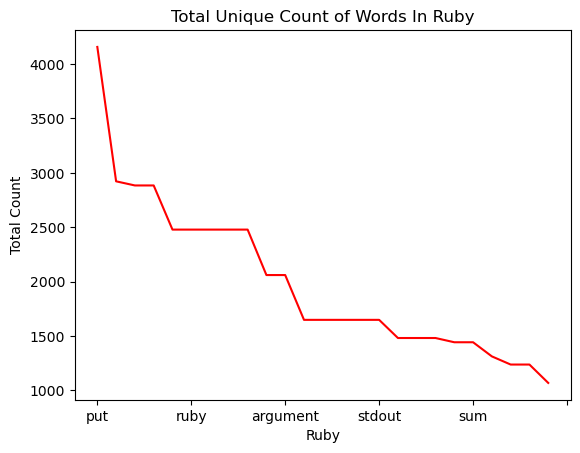

In [595]:
ruby_df=pd.concat([word_counts[word_counts.Ruby == 0],
           word_counts[word_counts.Python == 0],
           word_counts[word_counts.Java == 0], 
           word_counts[word_counts.Javascript == 0], 
           word_counts[word_counts.C_based == 0],
          word_counts[word_counts.Other == 0]]
         ).sort_values(by=['Ruby'], ascending=False).head(25)
ruby_df['Ruby'].plot(color='red')
plt.title('Total Unique Count of Words In Ruby')
plt.xlabel('Ruby')
plt.ylabel('Total Count')

Text(0, 0.5, 'Total Count')

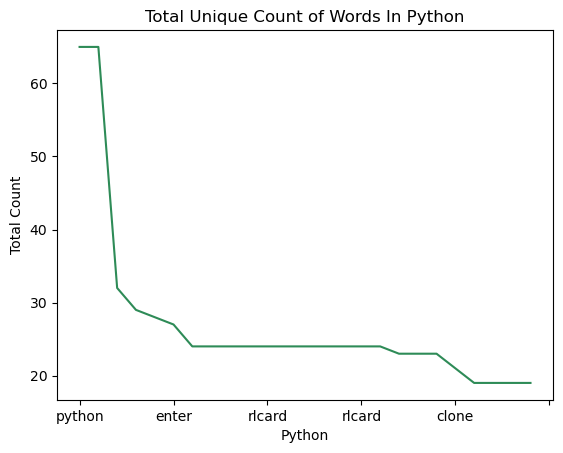

In [572]:
python_df = pd.concat([word_counts[word_counts.Ruby == 0],
           word_counts[word_counts.Python == 0],
           word_counts[word_counts.Java == 0], 
           word_counts[word_counts.Javascript == 0], 
           word_counts[word_counts.C_based == 0],
          word_counts[word_counts.Other == 0]]
         ).sort_values(by=['Python'], ascending=False).head(25)
python_df['Python'].plot(color='seagreen')
plt.title('Total Unique Count of Words In Python')
plt.xlabel('Python')
plt.ylabel('Total Count')

Text(0, 0.5, 'Total Count')

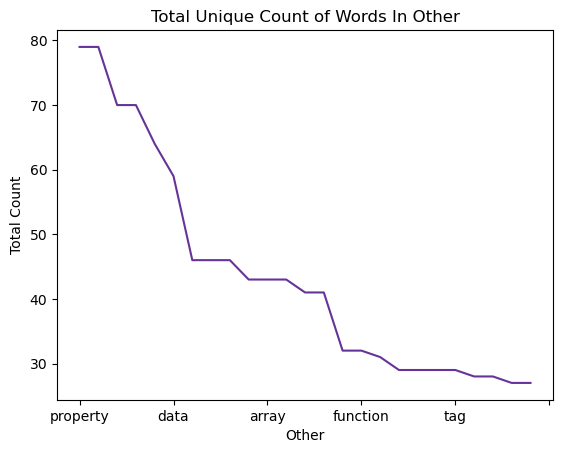

In [573]:
other_df= pd.concat([word_counts[word_counts.Ruby == 0],
           word_counts[word_counts.Python == 0],
           word_counts[word_counts.Java == 0], 
           word_counts[word_counts.Javascript == 0], 
           word_counts[word_counts.C_based == 0],
          word_counts[word_counts.Other == 0]]
         ).sort_values(by=['Other'], ascending=False).head(25)
other_df['Other'].plot(color='rebeccapurple')
plt.title('Total Unique Count of Words In Other')
plt.xlabel('Other')
plt.ylabel('Total Count')

Text(0, 0.5, 'Total Count')

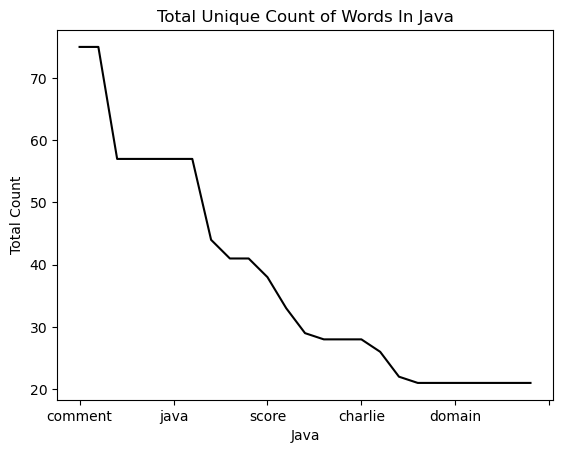

In [575]:
java_df=pd.concat([word_counts[word_counts.Ruby == 0],
           word_counts[word_counts.Java == 0], 
           word_counts[word_counts.Javascript == 0], 
           word_counts[word_counts.C_based == 0],
          word_counts[word_counts.Other == 0]]
         ).sort_values(by=['Java'], ascending=False).head(25)
java_df['Java'].plot(color='black')
plt.title('Total Unique Count of Words In Java')
plt.xlabel('Java')
plt.ylabel('Total Count')

Text(0, 0.5, 'Total Count')

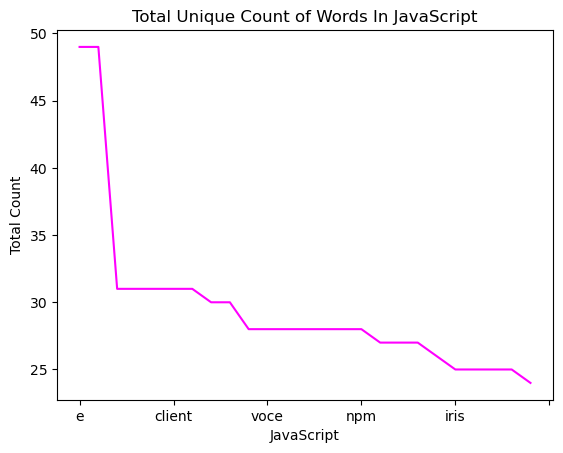

In [577]:
js_df= pd.concat([word_counts[word_counts.Ruby == 0],
           word_counts[word_counts.Java == 0], 
           word_counts[word_counts.Javascript == 0], 
           word_counts[word_counts.C_based == 0],
          word_counts[word_counts.Other == 0]]
         ).sort_values(by=['Javascript'], ascending=False).head(25)
js_df['Javascript'].plot(color='magenta')
plt.title('Total Unique Count of Words In JavaScript')
plt.xlabel('JavaScript')
plt.ylabel('Total Count')

Text(0, 0.5, 'Total Count')

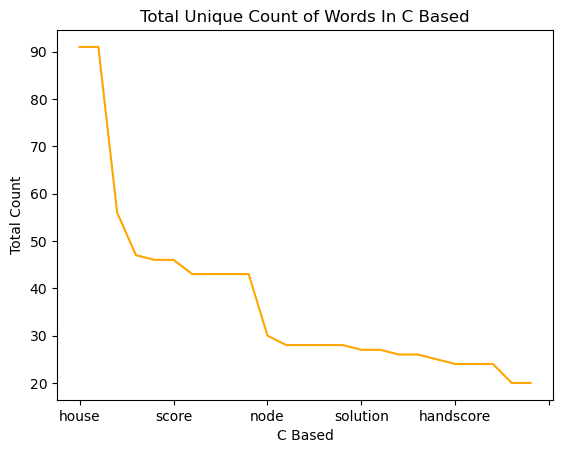

In [578]:
c_df= pd.concat([word_counts[word_counts.Ruby == 0],
           word_counts[word_counts.Java == 0], 
           word_counts[word_counts.Javascript == 0], 
           word_counts[word_counts.C_based == 0],
          word_counts[word_counts.Other == 0]]
         ).sort_values(by=['C_based'], ascending=False).head(25)
c_df['C_based'].plot(color='orange')
plt.title('Total Unique Count of Words In C Based')
plt.xlabel('C Based')
plt.ylabel('Total Count')

property       False
house          False
house          False
model          False
data           False
               ...  
resplit        False
responsible    False
responsibly    False
responsive     False
zwischen        True
Length: 15797, dtype: bool

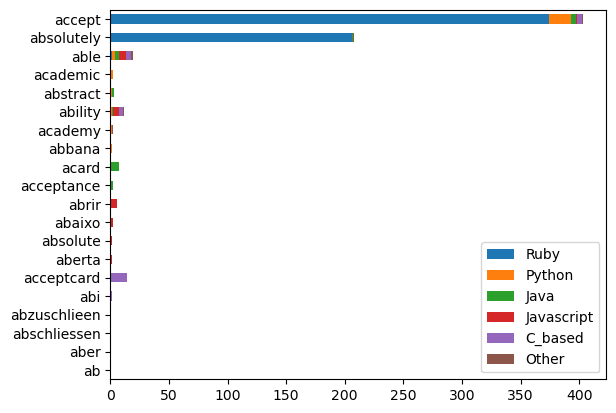

In [487]:
(word_counts.assign(ruby=word_counts.Ruby / word_counts['All'],
                    python=word_counts.Python / word_counts['All'],
                    java=word_counts.Java / word_counts['All'],
         javascript=word_counts.Javascript / word_counts['All'],
         c_based_freq=word_counts.C_based / word_counts['All'],
         other=word_counts.Other / word_counts['All'])
 .head(20)
 [['Ruby', 'Python', 'Java', 'Javascript', 'C_based', 'Other']].sort_values(by=['Ruby','Python', 'Java', 'Javascript', 'C_based', 'Other'])
 .plot.barh(stacked=True))
plt.show()

In [390]:
ruby=word_counts.Ruby / word_counts['All']

In [426]:
ruby.sort_values(ascending=True)

ab             0.0
permissible    0.0
permission     0.0
permutation    0.0
persist        0.0
              ... 
cwdg           1.0
seir           1.0
selenium       1.0
depth          1.0
remind         1.0
Length: 4410, dtype: float64

In [453]:
counts_df= pd.concat([word_counts[word_counts.Ruby == 0].sort_values(by='Ruby').tail(1),
           word_counts[word_counts.Python == 0].sort_values(by='Python').tail(1), 
           word_counts[word_counts.Java == 0].sort_values(by='Java').tail(1),
            word_counts[word_counts.Javascript == 0].sort_values(by='Javascript').tail(2),
           word_counts[word_counts.C_based == 0].sort_values(by='C_based').tail(2),
          word_counts[word_counts.Other == 0].sort_values(by='Other').tail(2)])

In [454]:
counts_df

,Ruby,Python,Java,Javascript,C_based,Other,All
zwischen,0,0,0,0,0,0,1
zwischen,0,0,0,0,0,0,1
zwischen,0,0,0,0,0,0,1
flat,0,0,0,0,1,0,1
zwischen,0,0,0,0,0,0,1
fazer,0,0,0,4,0,0,4
zwischen,0,0,0,0,0,0,1
favorite,1,0,1,0,0,0,2
zwischen,0,0,0,0,0,0,1
